# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## The Normal Equation

In [2]:
# synthetic linear looking data
X = 2 * np.random.rand(100, 1) #<100x1>
y = 4 + 3 * X + np.random.randn(100, 1)

$y=3x+4$+noise

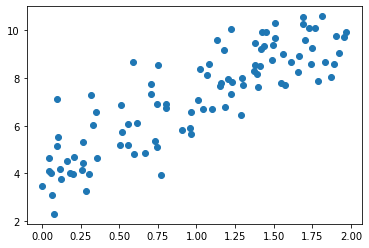

In [3]:
plt.scatter(X,y)

In [4]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance  <100x2>
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # NORMAL EQUATION

In [5]:
theta_best

array([[4.14867202],
       [3.03127222]])

**TILL HERE (28/10/2021)**

The data was generated by means of `y=4+3x+<gaussian noise>`. 
The retrieved parameters for theta are close enought but the added noise made it impossible to recover the exact parameters of the original function.

The the calculated theta values can be used to make predictions



In [6]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.14867202],
       [10.21121646]])

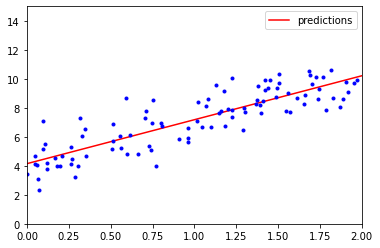

In [7]:
#visualization of the model's prediction
plt.plot(X_new, y_predict, "r-", label="predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.legend()
plt.show()

### Linear Regression with sklearn

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("Intercept={}, Slope={}".format(lin_reg.intercept_, lin_reg.coef_))

Intercept=[4.14867202], Slope=[[3.03127222]]


In [9]:
lin_reg.predict(X_new)

array([[ 4.14867202],
       [10.21121646]])

The `LinearRegression` class performs a `LeastSquare` optimization task, which can be called directly

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.14867202],
       [3.03127222]])

## Batch Gradient Descent

In [11]:
eta = 0.1 # learning rate 
n_iterations = 1000 
m=100 #number of samples on the training set

theta = np.random.randn(2,1) # random initialization <2x1>

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
  theta = theta - eta * gradients

In [12]:
theta

array([[4.14867202],
       [3.03127222]])

These values are exactly what the Normal Equation found!

#### PRACTICE 1

Plot the variuos regression lines with the updated thetas at each iteration of the Gradient Descent (reduce the number of iterations to 30)

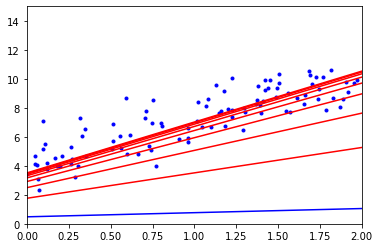

In [13]:
eta = 0.1 # learning rate 
n_iterations = 8 
m=100 #number of samples on the training set

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

theta = np.random.randn(2,1) # random initialization <2x1>
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, "b-")

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
  theta = theta - eta * gradients
  #plot the line
  y_predict = X_new_b.dot(theta)
  plt.plot(X_new, y_predict, "r-")


#### PRACTICE 2

Repeate Practice 1 with different values of eta (learning rate) and analyse the GD behavior. (Try with $\eta=0.02$ and $\eta=0.5$)

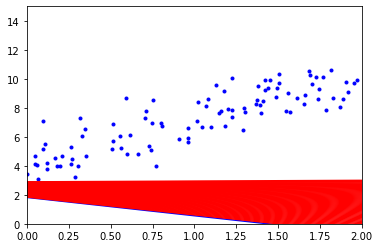

In [14]:
eta = 0.002 # learning rate 
n_iterations = 50 
m=100 #number of samples on the training set

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

theta = np.random.randn(2,1) # random initialization <2x1>
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, "b-")

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
  theta = theta - eta * gradients
  #plot the line
  y_predict = X_new_b.dot(theta)
  plt.plot(X_new, y_predict, "r-")


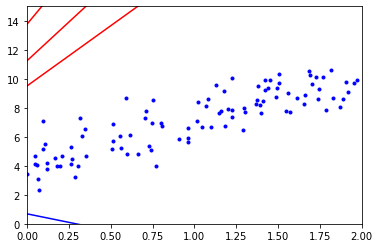

In [15]:
eta = 0.5 # learning rate 
n_iterations = 100 
m=100 #number of samples on the training set

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])

theta = np.random.randn(2,1) # random initialization <2x1>
y_predict = X_new_b.dot(theta)
plt.plot(X_new, y_predict, "b-")

for iteration in range(n_iterations):
  gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) 
  theta = theta - eta * gradients
  #plot the line
  y_predict = X_new_b.dot(theta)
  plt.plot(X_new, y_predict, "r-")


## Stochastic Gradient Descent

### SGD with simple learning schedule

In [16]:
# synthetic linear looking data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

m=100 #number of samples on the training set

def learning_schedule(t): 
  return t0/(t+t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs): 
  for i in range(m):
    random_index = np.random.randint(m)
    xi = X_b[random_index:random_index+1]
    yi = y[random_index:random_index+1]
    gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients
    

By convention we iterate by rounds of `m` iterations; each round is called an `epoch`. 

* Batch Gradient Descent (above) iterated 1,000 times through the whole training set
* Stochastic Gradient Descent goes through the training set only 50 times and reaches a fairly good solution

### PRACTIVE 3
Which are the first 5 values of the *lerning rate* in the SGD procedure above?

### PRACTICE 4

Plot the first 20 steps of the SDG procedure above (20 predictive line)

### Linear Regression wirh SGD using Sklearn

In [17]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=10, tol=1e-3, penalty=None, eta0=0.1) 
sgd_reg.fit(X, y.ravel())

/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:1503: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(eta0=0.1, max_iter=10, penalty=None)

The `SGDRegressor` optimizes the **Squared Error cost function**.
The code above stops:
*  after 1000 iterations (**epochs**)
*  if the loss drops by less than `1e-3` during one epoch (**tolerance**) 
* starting eta is `0.1` (**default learning schedule**)

In [18]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.05423265]), array([2.98370639]))

### PRACTICE 5
Do you get similar values as the ones obtained with the Normal Equation?

## Polynomial Regression

In [19]:
# syntetic data generation (quadratic equation + noise)
m=100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, 'y')

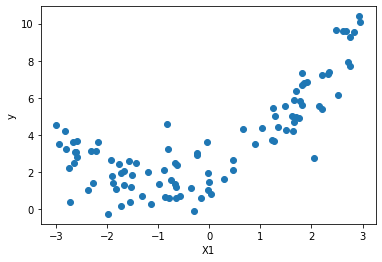

In [20]:
plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')

Clearly, a straight line will never fit this data properly. So let’s use Scikit-Learn’s `PolynomialFeatures` class to transform our training data, adding the square (2nd-degree polynomial) of each feature in the training set as new features (in this case there is just one feature)

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [22]:
X[0]

array([-0.80883688])

In [23]:
X_poly[0]

array([-0.80883688,  0.6542171 ])

`X_poly` now contains the original feature of `X` plus the square of this feature. 

Now you can fit a LinearRegression model to this extended training data

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.00324176]), array([[1.07781945, 0.52835412]]))

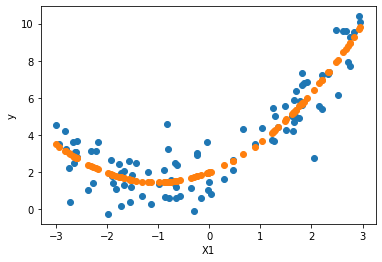

In [25]:
plt.scatter(X,y)
plt.xlabel('X1')
plt.ylabel('y')

plt.scatter(X, lin_reg.predict(X_poly),label='prediciton')

the model estimates 

$𝚢 = 0.47 x^2 +0.89 x + 2.2$

when the original function was 

$y = 0.5x^2 + 1.0x + 2.0 +$ Gaussian noise.

#### NOTE 
When there are multiple features, Polynomial Regression is capable of finding relationships between features (which is something a plain Linear Regression model cannot do). This is made possible by the fact that `PolynomialFeatures` also adds all combinations of features up to the given degree. 


> For example, if there were two features **a** and **b**, `PolynomialFeatures` with ***degree=3*** would not only add the features $a^2$, $a^3$, $b^2$, and $b^3$, but also the combinations $ab$, $a^2b$, and $ab^2$.

Beware of the combinatorial explosion of the number of features!



## Learning Curve

Simple Linear Regression

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 
  train_errors, val_errors = [], []
  
  for m in range(1, len(X_train)):

    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)

    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

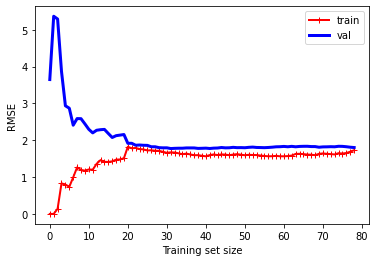

In [27]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.legend()

$10^{th}$-degree polynomial model on the same data

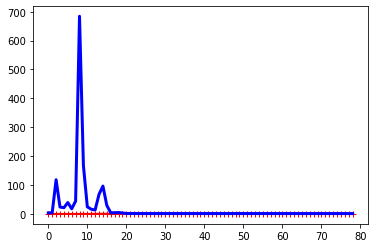

In [28]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
                                  ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
                                  ("lin_reg", LinearRegression()),
                                  ])
plot_learning_curves(polynomial_regression, X, y)

## Ridge Regression

Ridge Regression using the closed-form solution (solver, variant using a Matrix Factorization technique)

In [29]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

Ridge(alpha=1, solver='cholesky')

In [30]:
ridge_reg.predict([[1.5]])

array([[5.34595534]])

Ridge Regression using Stochastic Gradient Descent

In [31]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())

sgd_reg.predict([[1.5]])

array([5.34722547])

#### PRACTICE 6 
Consider the syntetic data generated above and evaluate a LinearRegression model and a RidgeRegression model (with a fixed value of $alpha=1$ on subsets of increasing size. Plot the model performance ($R^2$) as a function of the dataset size. The plot should include:
1. train performance for Ridge
2. test performance for Ridge
3. train performance for Linear Regression
4. test performance for Linear Regression

What does the plot tell us?

/home/christian/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/tmp/ipykernel_29706/1331013743.py:28: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(val_errors), c+'-', linewidth=3, label="test_"+model_type)
/home/christian/.local/lib/python3.9/site-packages/sklearn/metrics/_regression.py:781: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/tmp/ipykernel_29706/1331013743.py:28: RuntimeWarning: invalid value encountered in sqrt
  plt.plot(np.sqrt(val_errors), c+'-', linewidth=3, label="test_"+model_type)


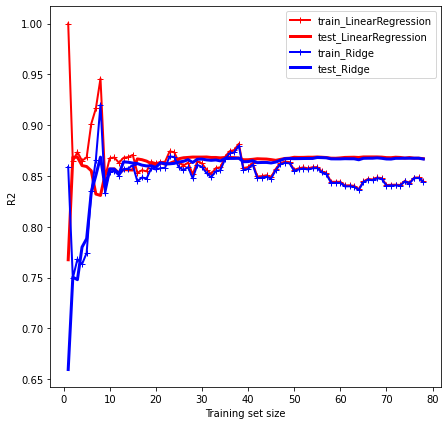

In [32]:
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

# synthetic linear looking data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.figure(figsize=(7,7))

def plot_learning_curves(model, X, y, model_type, c):
  
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) 
    train_errors, val_errors = [], []
  
    for m in range(1, len(X_train)):

        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)

        train_errors.append(r2_score(y_train[:m], y_train_predict))
        val_errors.append(r2_score(y_val, y_val_predict))
  
    plt.plot(np.sqrt(train_errors), c+"-+", linewidth=2, label="train_"+model_type)
    plt.plot(np.sqrt(val_errors), c+'-', linewidth=3, label="test_"+model_type)


lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y, "LinearRegression", 'r')

ridge_reg = Ridge(alpha=1, solver="cholesky")
plot_learning_curves(ridge_reg, X, y, "Ridge", 'b')

plt.xlabel('Training set size')
plt.ylabel('R2')
plt.legend()

## Lasso Regression

We could instead use an `SGDRegressor(penalty="l1")`

In [33]:
from sklearn.linear_model import Lasso 
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.35047788])

#### PRACTICE 7
Consider the diabetes dataset available on sklearn and verify the number of features selected (related coefficient $theta$ different from zero) with different values fo alpha.


/tmp/ipykernel_29706/796226631.py:11: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso = Lasso(alpha=alpha, max_iter=1000).fit(X_train, y_train)
/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/home/christian/.local/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.063e+05, tolerance: 2.145e+02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_co

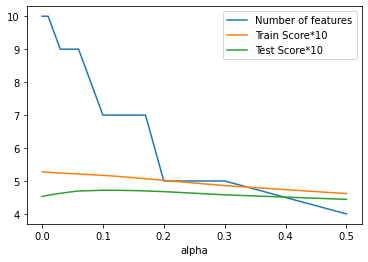

In [34]:
from sklearn.linear_model import Lasso 
from sklearn.datasets import load_diabetes

data = load_diabetes()

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2, random_state=42) 

num_features, train_score, test_score = [],[],[]
alpha_values = [0, 0.001,0.01, 0.03, 0.05, 0.06, 0.1, 0.12, 0.15, 0.17, 0.2, 0.3, 0.5]
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha, max_iter=1000).fit(X_train, y_train) 

    #print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
    train_score.append(lasso.score(X_train, y_train))
    #print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
    test_score.append(lasso.score(X_test, y_test))
    #print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))
    num_features.append(np.sum(lasso.coef_ != 0)) # [1,0,0,1] <= theta = [0.03, 0, 0, 0.02]

plt.plot(alpha_values, num_features, label="Number of features")
plt.plot(alpha_values, [element * 10 for element in train_score], label="Train Score*10")
plt.plot(alpha_values, [element * 10 for element in test_score], label="Test Score*10")

plt.xlabel('alpha')
plt.legend()


## Early Stopping
Basic implementation of early stopping

In [35]:
from sklearn.base import clone

# prepare the data
poly_scaler = Pipeline([
                        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
                        ("std_scaler", StandardScaler())
                        ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)
#with warm_start=True, when the fit() method is called, it just continues training 
#where it left off instead of restarting from scratch

minimum_val_error = float("inf") 
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off 
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)


NameError: name 'StandardScaler' is not defined